# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

### Generate the Cities List by Using the `citipy` Library

In [3]:
# conda list

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
#      city_url = f"{url}appid={api_key}&units={units}&q="
        
    city_url = url + "q=" + city + "&units=Metric" + "&APPID=" + weather_api_key
     
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | sai buri
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | barcelona
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | nioro
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | kupang
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | port alfred
Processing Rec

Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | druzhba
Processing Record 40 of Set 4 | charagua
Processing Record 41 of Set 4 | cap malheureux
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | puerto del rosario
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | itaituba
Processing Record 47 of Set 4 | ucluelet
Processing Record 48 of Set 4 | cacapava do sul
Processing Record 49 of Set 4 | sena madureira
Processing Record 0 of Set 5 | araouane
Processing Record 1 of Set 5 | at-bashi
Processing Record 2 of Set 5 | ugoofaaru
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | chicama
Processing Record 5 of Set 5 | maku
Processing Record 6 of Set 5 | punalur
Processing Record 7 of Set 5 | neepawa
Processing Record 8 of Set 5 | kushiro
Processing Record 9 of Set 5 | olinda
Processing Record 10 of 

Processing Record 29 of Set 8 | hall
Processing Record 30 of Set 8 | letterkenny
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | caravelas
Processing Record 33 of Set 8 | wete
Processing Record 34 of Set 8 | kitui
Processing Record 35 of Set 8 | san cristobal
Processing Record 36 of Set 8 | vagamo
Processing Record 37 of Set 8 | ixtapa
Processing Record 38 of Set 8 | cumra
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | brae
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | kulhudhuffushi
Processing Record 43 of Set 8 | kodiak
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | januaria
Processing Record 46 of Set 8 | dongsheng
Processing Record 47 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 8 | katsuura
Processing Record 49 of Set 8 | qaqortoq
Processing Record 0 of Set 9 | himora
City not found. Skipping...
Processing Record 1 of Set 9 | inuvik
Proces

Processing Record 16 of Set 12 | simoes
Processing Record 17 of Set 12 | pemba
Processing Record 18 of Set 12 | poroina mare
Processing Record 19 of Set 12 | kichera
Processing Record 20 of Set 12 | kijang
Processing Record 21 of Set 12 | bulawayo
Processing Record 22 of Set 12 | dargaville
Processing Record 23 of Set 12 | south sioux city
Processing Record 24 of Set 12 | chivilcoy
Processing Record 25 of Set 12 | yarega
Processing Record 26 of Set 12 | manavalakurichi
Processing Record 27 of Set 12 | shostka
Processing Record 28 of Set 12 | chara
Processing Record 29 of Set 12 | ahipara
Processing Record 30 of Set 12 | neyshabur
Processing Record 31 of Set 12 | terney
Processing Record 32 of Set 12 | west wendover
Processing Record 33 of Set 12 | bondo
Processing Record 34 of Set 12 | morro bay
Processing Record 35 of Set 12 | sorland
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | lompoc
Processing Record 38 of Set 12 | newport
Processing Record 39 of Set 

In [6]:
# url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-26.76,94,100,6.58,GL,1675661655
1,victoria,22.2855,114.1577,22.76,84,97,3.13,HK,1675661538
2,isangel,-19.5500,169.2667,28.98,73,96,2.38,VU,1675661652
3,avarua,-21.2078,-159.7750,27.03,83,40,4.12,CK,1675661656
4,sai buri,6.7013,101.6168,28.84,74,100,3.67,TH,1675661657


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-26.76,94,100,6.58,GL,1675661655
1,victoria,22.2855,114.1577,22.76,84,97,3.13,HK,1675661538
2,isangel,-19.5500,169.2667,28.98,73,96,2.38,VU,1675661652
3,avarua,-21.2078,-159.7750,27.03,83,40,4.12,CK,1675661656
4,sai buri,6.7013,101.6168,28.84,74,100,3.67,TH,1675661657


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

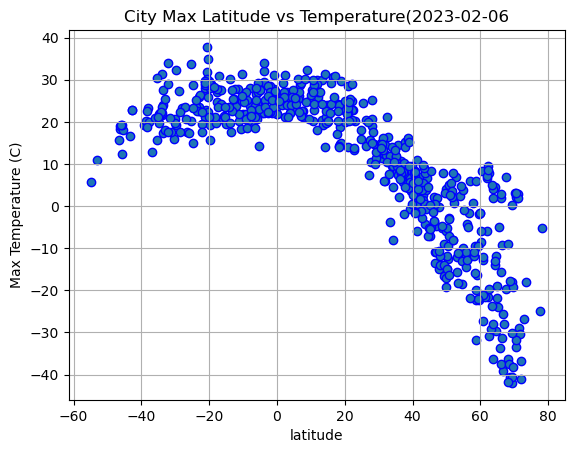

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='blue')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature({pd.to_datetime(city_date, unit='s').date()}")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

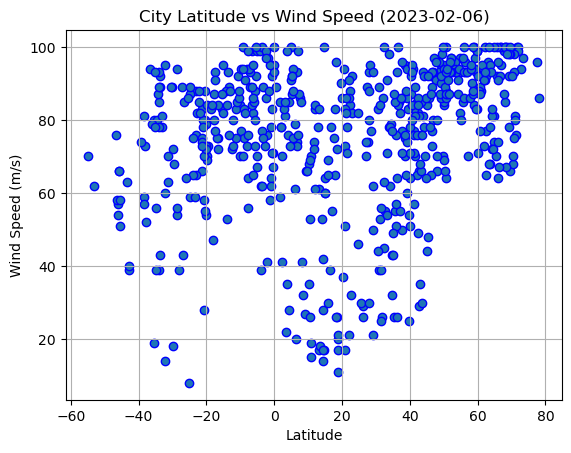

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
width = 480
height = 640
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

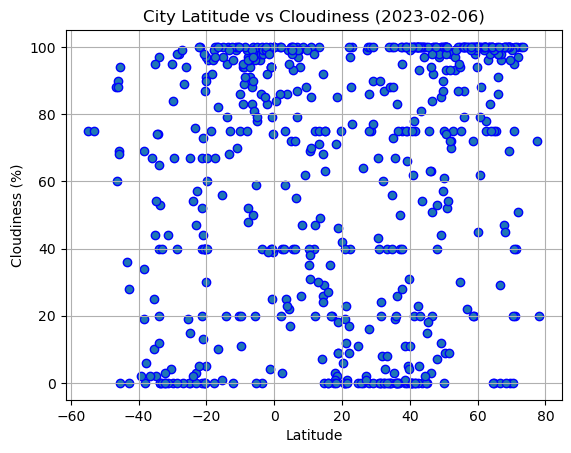

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

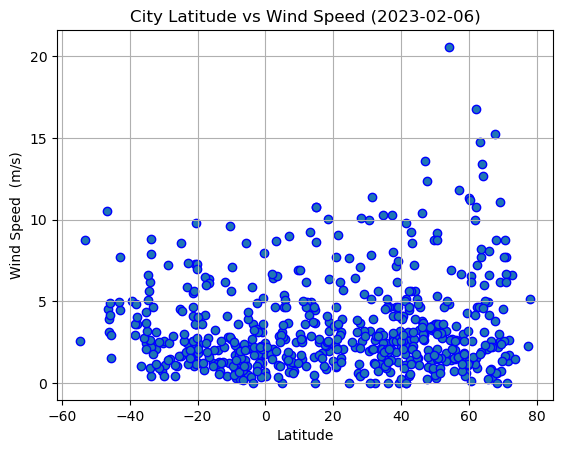

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed  (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_reg_plot( x_values, y_values, z_text_coord, y_label):
    
   
 # create the linear regression
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
       
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.annotate(line_eq, z_text_coord, fontsize=15,color="red")
# print the r_alue 
    print(f"The r-value is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Northen_hemisphere_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
Northen_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-26.76,94,100,6.58,GL,1675661655
1,victoria,22.2855,114.1577,22.76,84,97,3.13,HK,1675661538
4,sai buri,6.7013,101.6168,28.84,74,100,3.67,TH,1675661657
5,butaritari,3.0707,172.7902,27.09,81,59,8.72,KI,1675661657
6,barcelona,41.3888,2.1590,11.04,70,75,5.14,ES,1675661510


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isangel,-19.5500,169.2667,28.98,73,96,2.38,VU,1675661652
3,avarua,-21.2078,-159.7750,27.03,83,40,4.12,CK,1675661656
7,bengkulu,-3.8004,102.2655,29.48,62,86,5.86,ID,1675661658
9,hobart,-42.8794,147.3294,22.92,39,0,7.72,AU,1675661489
10,ushuaia,-54.8000,-68.3000,5.81,70,75,2.57,AR,1675661506


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8630422350344186


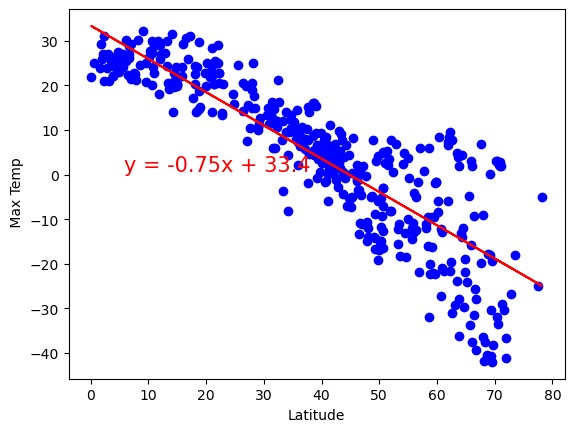

In [18]:
# Linear regression on Northern Hemisphere
x_values = Northen_hemisphere_df["Lat"]
y_values = Northen_hemisphere_df["Max Temp"]
linear_reg_plot(x_values, y_values, (5.8, 0.8)," Max Temp") 



The r-value is: 0.3623279196717154


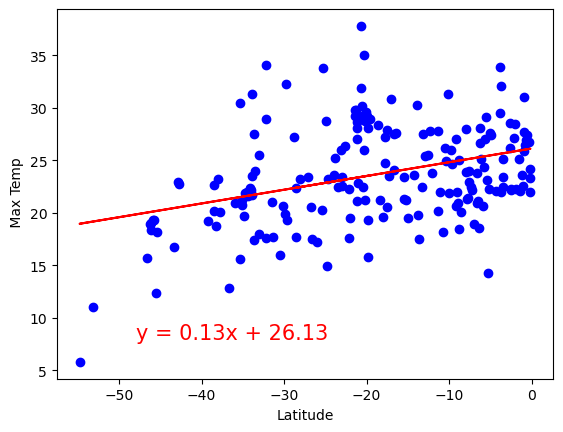

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_reg_plot(x_values, y_values, (-48, 8), " Max Temp") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4404171225395451


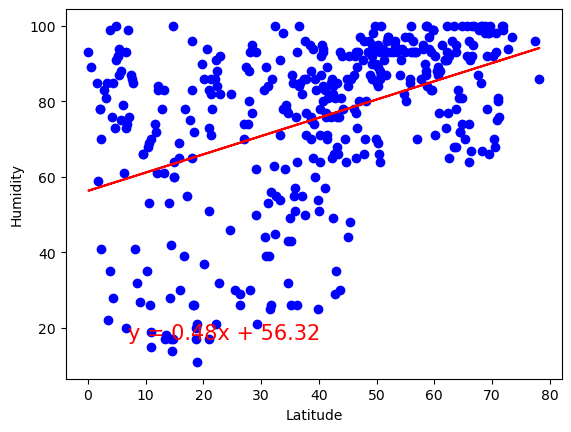

In [20]:
# Northern Hemisphere
x_values = Northen_hemisphere_df["Lat"]
y_values = Northen_hemisphere_df["Humidity"]
linear_reg_plot(x_values, y_values, (7, 17), "Humidity") 

The r-value is: 0.366853123126832


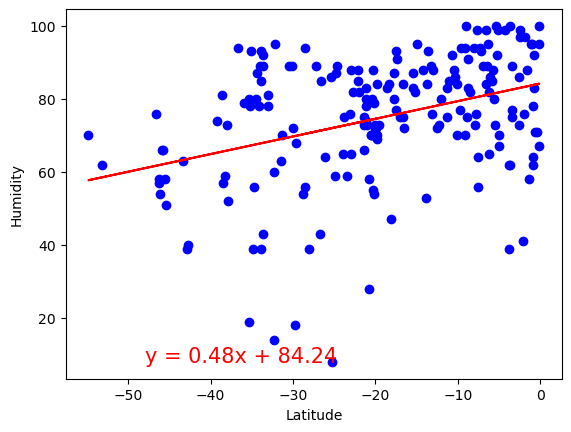

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_reg_plot(x_values, y_values, (-48, 8), "Humidity") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25882893950187524


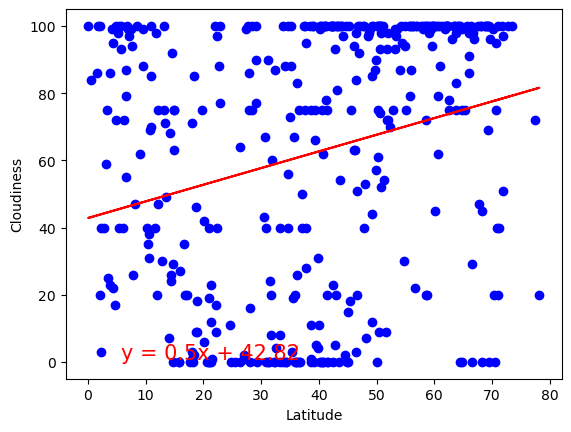

In [22]:
# Northern Hemisphere
x_values = Northen_hemisphere_df["Lat"]
y_values = Northen_hemisphere_df["Cloudiness"]
linear_reg_plot(x_values, y_values, (5.8, 0.8),"Cloudiness") 

The r-value is: 0.35740140133734755


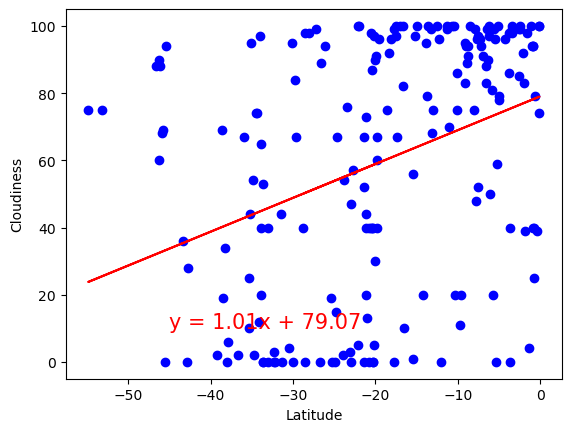

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_reg_plot(x_values, y_values, (-45, 10),"Cloudiness") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is: 0.09213227623650519


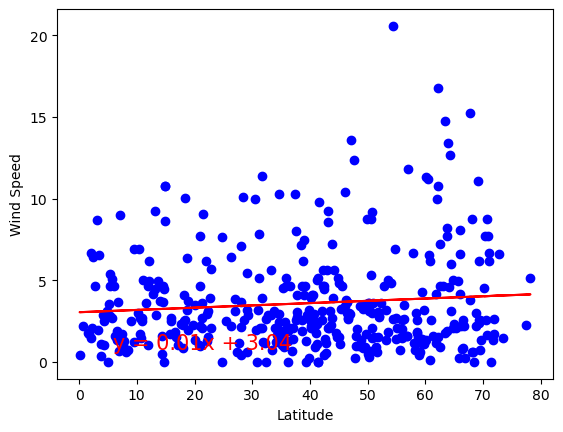

In [24]:
# Northern Hemisphere
x_values = Northen_hemisphere_df["Lat"]
y_values = Northen_hemisphere_df["Wind Speed"]
linear_reg_plot(x_values, y_values, (5.8, 0.8),"Wind Speed") 

In [25]:
#Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.2792764599952158


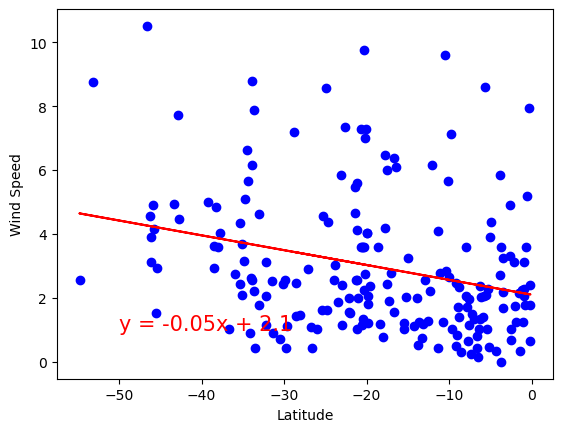

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_reg_plot(x_values, y_values, (-50, 1),"Wind Speed")

**Discussion about the linear relationship:**  